In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('emails.csv')

In [5]:
df.shape

(5172, 3002)

In [6]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
#input data
x = df.drop(['Email No.', 'Prediction'], axis = 1)

#ouput data
y = df['Prediction']

In [8]:
x.shape

(5172, 3000)

In [9]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

<Axes: xlabel='Prediction', ylabel='count'>

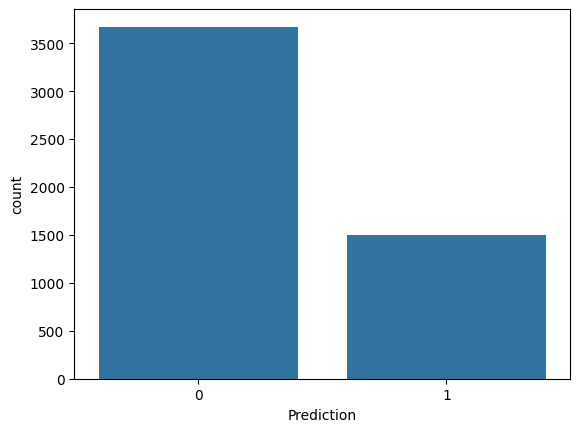

In [10]:
import seaborn as sns
sns.countplot(x = y)

In [11]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [12]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [13]:
x_scaled

array([[-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [ 0.11575699,  0.71450797,  1.33733653, ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       ...,
       [-0.56544926, -0.64908256, -0.2938948 , ..., -0.0562853 ,
        -0.32904848, -0.07097072],
       [-0.3951477 ,  0.0851585 , -0.2938948 , ..., -0.0562853 ,
         0.03067224, -0.07097072],
       [ 1.30786793,  1.86831533, -0.0102024 , ..., -0.0562853 ,
        -0.32904848, -0.07097072]])

In [14]:
# Cross-validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 0)

In [15]:
#import the KNN
from sklearn.neighbors import KNeighborsClassifier


In [16]:
#Create the object
knn = KNeighborsClassifier(n_neighbors = 5)

In [17]:
# Train the algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
#Predict on test data
y_pred = knn.predict(x_test)

In [19]:
#import the evaluation metrics
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

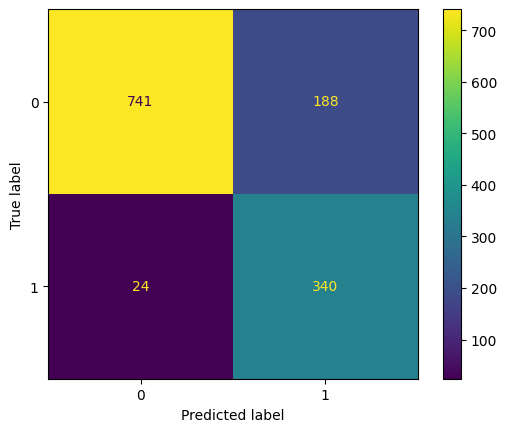

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [21]:
y_test.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [22]:
accuracy_score(y_test, y_pred)

0.8360402165506574

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       929
           1       0.64      0.93      0.76       364

    accuracy                           0.84      1293
   macro avg       0.81      0.87      0.82      1293
weighted avg       0.88      0.84      0.84      1293



In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
error = []
for k in range(1, 41):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  error.append(np.mean(pred != y_test))

In [26]:
error

[0.1136890951276102,
 0.102861562258314,
 0.1531322505800464,
 0.13843774168600154,
 0.16395978344934262,
 0.1585460170146945,
 0.1956689868522815,
 0.18793503480278423,
 0.2211910286156226,
 0.21809744779582366,
 0.24207269914926527,
 0.23665893271461716,
 0.2660479505027069,
 0.2637277648878577,
 0.28074245939675174,
 0.2791956689868523,
 0.29156999226604796,
 0.2923433874709977,
 0.3047177107501933,
 0.3039443155452436,
 0.31322505800464034,
 0.31245166279969067,
 0.32637277648878577,
 0.3271461716937355,
 0.33642691415313225,
 0.3333333333333333,
 0.34416086620262953,
 0.3433874709976798,
 0.35730858468677495,
 0.3534416086620263,
 0.3619489559164733,
 0.36040216550657383,
 0.3720030935808198,
 0.3704563031709203,
 0.37819025522041766,
 0.37587006960556846,
 0.3866976024748647,
 0.3805104408352668,
 0.38979118329466356,
 0.3882443928847641]

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [29]:
y_pred = knn.predict(x_test)

In [30]:
accuracy_score(y_test, y_pred)

0.8863109048723898

In [31]:
from sklearn.svm import SVC

In [32]:
svm = SVC(kernel = 'linear')

In [33]:
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred = svm.predict(x_test)

In [35]:
accuracy_score(y_test, y_pred)

0.9505027068832174